In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()

In [2]:
from utils.load_data import load_data
from utils.visualize import visualize_model

In [3]:
device = ('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
resnet18_0 = models.resnet18(pretrained=True)
num_ftrs = resnet18_0.fc.in_features

resnet18_0.fc = nn.Linear(num_ftrs, 2)

resnet18_0 = resnet18_0.to(device)

resnet18_0.load_state_dict(torch.load('../models/resnet18_0'))

<All keys matched successfully>

In [5]:
dataloaders, dataset_sizes, class_names = load_data('../data')

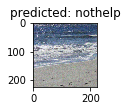

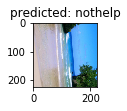

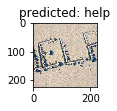

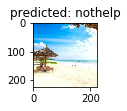

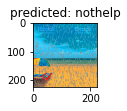

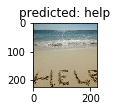

In [6]:
visualize_model(resnet18_0, dataloaders, device, class_names, num_images=6)

In [7]:
def test_model(model, testloader):
    correct = 0
    total = 0
    device=('cuda:0' if torch.cuda.is_available() else 'cpu')
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total+=labels.size(0)
            correct+=(predicted==labels).sum().item()
    print('Accuracy of the model on {} test images is {:.2f}'.format(dataset_sizes['test'], 100*correct/total))

In [8]:
# resnet18_0.parameters

In [9]:
reslen = len([x for x in resnet18_0.parameters()])
count=0
for param in resnet18_0.parameters():
    count+=1
    if count==reslen:
        break
    param.requires_grad = False

In [10]:
from utils.train_model import train_model

In [11]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(resnet18_0.parameters())

scheduler = lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1)

In [12]:
train_loaders = {x:dataloaders[x] for x in ['train','val']}
resnet18_0 = train_model(resnet18_0, train_loaders, dataset_sizes, criterion, optimizer, scheduler, num_epochs=10)

Epoch 0/9
----------
train Loss: 0.1005 Acc: 0.9621
val Loss: 0.0967 Acc: 0.9658
Epoch time: 2m 51s

Epoch 1/9
----------
train Loss: 0.1012 Acc: 0.9651
val Loss: 0.0910 Acc: 0.9623
Epoch time: 2m 48s

Epoch 2/9
----------
train Loss: 0.1028 Acc: 0.9648
val Loss: 0.1092 Acc: 0.9555
Epoch time: 2m 47s

Epoch 3/9
----------
train Loss: 0.0903 Acc: 0.9681
val Loss: 0.1004 Acc: 0.9589
Epoch time: 2m 50s

Epoch 4/9
----------
train Loss: 0.1067 Acc: 0.9567
val Loss: 0.1090 Acc: 0.9589
Epoch time: 2m 48s

Epoch 5/9
----------
train Loss: 0.1023 Acc: 0.9597
val Loss: 0.0912 Acc: 0.9760
Epoch time: 2m 49s

Epoch 6/9
----------
train Loss: 0.1050 Acc: 0.9609
val Loss: 0.1065 Acc: 0.9555
Epoch time: 2m 48s

Epoch 7/9
----------
train Loss: 0.1005 Acc: 0.9663
val Loss: 0.0935 Acc: 0.9658
Epoch time: 2m 51s

Epoch 8/9
----------
train Loss: 0.1084 Acc: 0.9588
val Loss: 0.0952 Acc: 0.9658
Epoch time: 2m 46s

Epoch 9/9
----------
train Loss: 0.1075 Acc: 0.9633
val Loss: 0.0967 Acc: 0.9589
Epoch time

In [ ]:
test_model(resnet18_0, dataloaders['test'])

In [ ]:
torch.save(resnet18_0.state_dict(), '../models/resnet18_01')

In [ ]:
# optimizer = optim.SGD(resnet18_0.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# resnet18_0.load_state_dict(torch.load('../models/resnet18_0'))

In [ ]:
# resnet18_0 = train_model(resnet18_0, train_loaders, dataset_sizes, criterion, optimizer, scheduler, num_epochs=10)

In [ ]:
# test_model(resnet18_0, dataloaders['test'])

In [ ]:
# torch.save(resnet18_0.state_dict(), '../models/resnet18_02')